In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio



In [29]:
df=pd.read_csv('retail_store_inventory.csv')
df.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [30]:
df.shape


(73100, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [32]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [33]:
df.duplicated().sum()

0

In [34]:
df.drop(columns = ['Store ID', 'Product ID'], axis=1, inplace = True)

In [35]:
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [38]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek
df['week_of_year'] = df['Date'].dt.isocalendar().week.astype(int)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,year,month,day,day_of_week,week_of_year,is_weekend
0,2022-01-01,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,2022,1,1,5,52,1
1,2022-01-01,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,2022,1,1,5,52,1
2,2022-01-01,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,2022,1,1,5,52,1
3,2022-01-01,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,2022,1,1,5,52,1
4,2022-01-01,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,2022,1,1,5,52,1


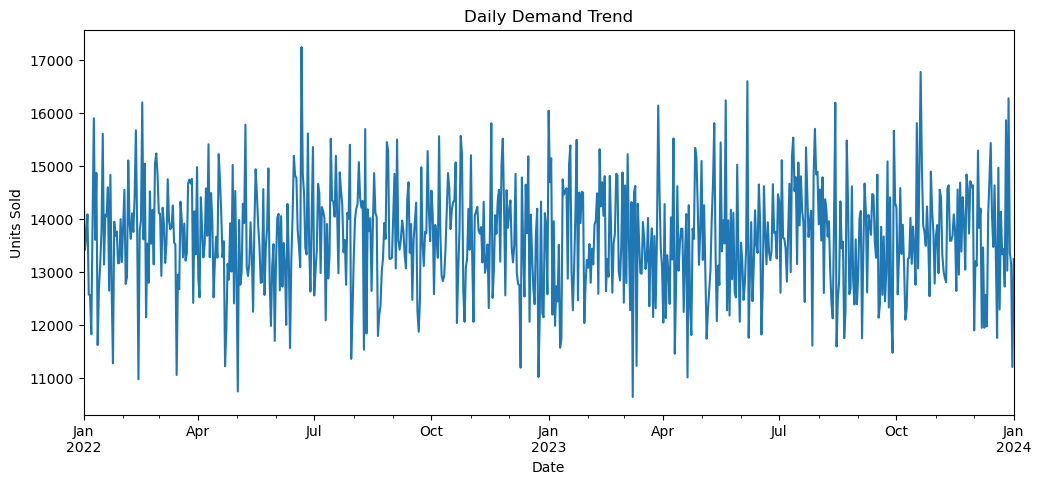

In [39]:
plt.figure(figsize=(12,5))
df.groupby('Date')['Units Sold'].sum().plot()
plt.title("Daily Demand Trend")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


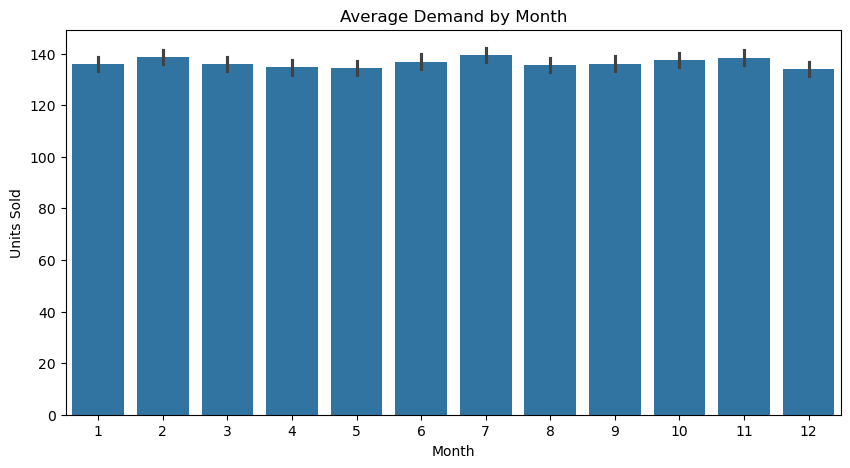

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='Units Sold', data=df, estimator=np.mean)
plt.title("Average Demand by Month")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.show()


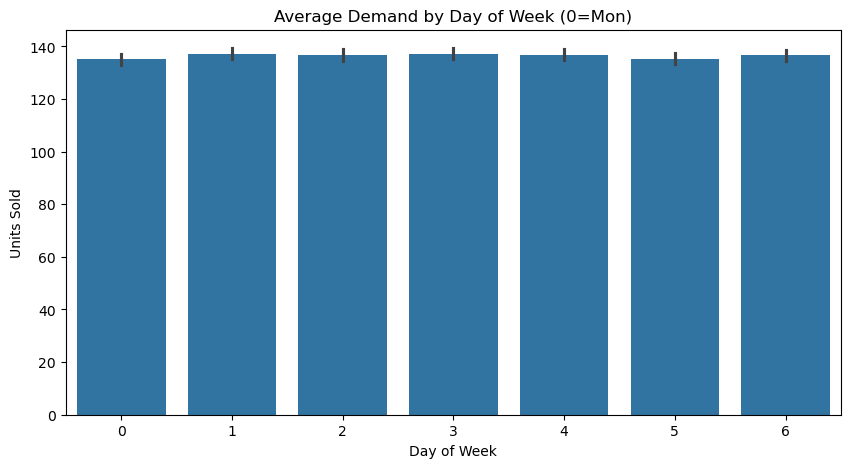

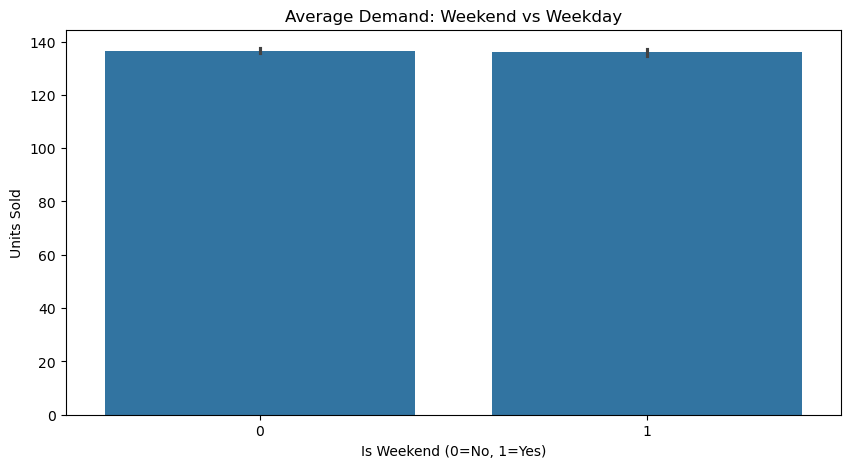

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='Units Sold', data=df, estimator=np.mean)
plt.title("Average Demand by Day of Week (0=Mon)")
plt.xlabel("Day of Week")
plt.ylabel("Units Sold")
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='is_weekend', y='Units Sold', data=df, estimator=np.mean)
plt.title("Average Demand: Weekend vs Weekday")
plt.xlabel("Is Weekend (0=No, 1=Yes)")
plt.ylabel("Units Sold")
plt.show()

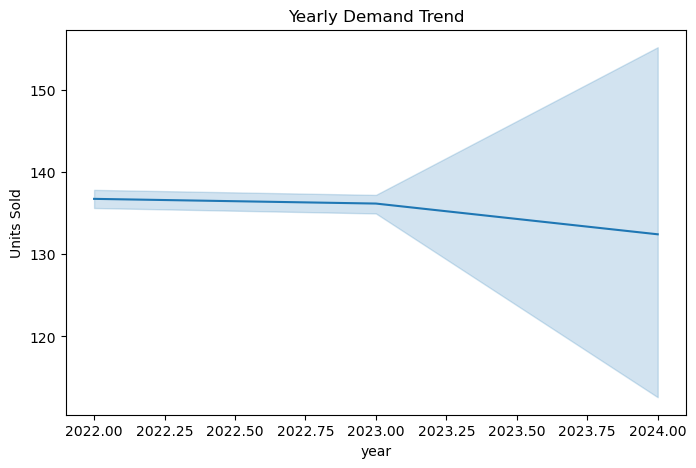

In [47]:
plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='Units Sold', data=df, estimator=np.mean)
plt.title("Yearly Demand Trend")
plt.show()
                    


In [48]:
group_cols = ['Category', 'Region']

df['lag_7'] = df.groupby(group_cols)['Units Sold'].shift(7)
df['lag_14'] = df.groupby(group_cols)['Units Sold'].shift(14)
df['lag_30'] = df.groupby(group_cols)['Units Sold'].shift(30)
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,...,Seasonality,year,month,day,day_of_week,week_of_year,is_weekend,lag_7,lag_14,lag_30
0,2022-01-01,Groceries,North,231,127,55,135.47,33.50,20,Rainy,...,Autumn,2022,1,1,5,52,1,NaN,NaN,NaN
1,2022-01-01,Toys,South,204,150,66,144.04,63.01,20,Sunny,...,Autumn,2022,1,1,5,52,1,NaN,NaN,NaN
2,2022-01-01,Toys,West,102,65,51,74.02,27.99,10,Sunny,...,Summer,2022,1,1,5,52,1,NaN,NaN,NaN
3,2022-01-01,Toys,North,469,61,164,62.18,32.72,10,Cloudy,...,Autumn,2022,1,1,5,52,1,NaN,NaN,NaN
4,2022-01-01,Electronics,East,166,14,135,9.26,73.64,0,Sunny,...,Summer,2022,1,1,5,52,1,NaN,NaN,NaN


In [50]:
df['rolling_mean_7'] = (
    df.groupby(group_cols)['Units Sold']
      .shift(1)
      .rolling(7)
      .mean()
)

df['rolling_mean_14'] = (
    df.groupby(group_cols)['Units Sold']
      .shift(1)
      .rolling(14)
      .mean()
)
df['rolling_mean_30'] = (
    df.groupby(group_cols)['Units Sold']
      .shift(1)
      .rolling(30)
      .mean()
)
df.head()


,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,...,day,day_of_week,week_of_year,is_weekend,lag_7,lag_14,lag_30,rolling_mean_7,rolling_mean_14,rolling_mean_30
0,2022-01-01,Groceries,North,231,127,55,135.47,33.50,20,Rainy,...,1,5,52,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,Toys,South,204,150,66,144.04,63.01,20,Sunny,...,1,5,52,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,Toys,West,102,65,51,74.02,27.99,10,Sunny,...,1,5,52,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,Toys,North,469,61,164,62.18,32.72,10,Cloudy,...,1,5,52,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,Electronics,East,166,14,135,9.26,73.64,0,Sunny,...,1,5,52,1,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df['price_diff_competitor'] = df['Price'] - df['Competitor Pricing']
df['discount_flag'] = (df['Discount'] > 0).astype(int)
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,...,week_of_year,is_weekend,lag_7,lag_14,lag_30,rolling_mean_7,rolling_mean_14,rolling_mean_30,price_diff_competitor,discount_flag
0,2022-01-01,Groceries,North,231,127,55,135.47,33.50,20,Rainy,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,3.81,1
1,2022-01-01,Toys,South,204,150,66,144.04,63.01,20,Sunny,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,-3.15,1
2,2022-01-01,Toys,West,102,65,51,74.02,27.99,10,Sunny,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,-3.33,1
3,2022-01-01,Toys,North,469,61,164,62.18,32.72,10,Cloudy,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,-2.02,1
4,2022-01-01,Electronics,East,166,14,135,9.26,73.64,0,Sunny,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,4.69,0


In [52]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,...,week_of_year,is_weekend,lag_7,lag_14,lag_30,rolling_mean_7,rolling_mean_14,rolling_mean_30,price_diff_competitor,discount_flag
0,2022-01-01,3,1,231,127,55,135.47,33.50,20,1,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,3.81,1
1,2022-01-01,4,2,204,150,66,144.04,63.01,20,3,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,-3.15,1
2,2022-01-01,4,3,102,65,51,74.02,27.99,10,3,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,-3.33,1
3,2022-01-01,4,1,469,61,164,62.18,32.72,10,0,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,-2.02,1
4,2022-01-01,1,0,166,14,135,9.26,73.64,0,3,...,52,1,NaN,NaN,NaN,NaN,NaN,NaN,4.69,0
